Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic, environmental and health issues.

Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by these systems make them attractive for the research. Opposed to other transport services such as bus or subway, the duration of travel, departure and arrival position is explicitly recorded in these systems. This feature turns bike sharing system into a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that most of important events in the city could be detected via monitoring these data.

https://www.kaggle.com/datasets/imakash3011/rental-bike-sharing#

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(rc={'axes.facecolor':'#c5c6c7'})
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA, IncrementalPCA
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("./bike-sharing/day.csv")
df_num = df.copy()
df.head().style.background_gradient(cmap='bone')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
df.shape

(731, 16)

# Initial data preprocessing

In [4]:
# Dropping the necessary columns
cols_to_drop = ['dteday','instant','casual','registered']

df.drop(columns=cols_to_drop, axis=1, inplace=True)
df_num.drop(columns=cols_to_drop, axis=1, inplace=True)

# Performing the necessary encoding
df['season'] = df['season'].map({1 : "Winter",2 : "Spring",3 : "Summer",4 : "Fall"})
df['weekday'] = df['weekday'].map({0 : "Saturday",1 : "Sunday",2 : "Monday",3 : "Tuesday",4 : "Wednesday",5 : "Thursday",6 : "Friday"})
df['mnth'] = df['mnth'].map({1 : "Jan",2 : "Feb",3 : "Mar",4 : "Apr",5 : "May",6 : "Jun",7 : "Jul",8 : "Aug",9 : "Sep",10 : "Oct",11 : "Nov",12 : "Dec"})
df['weathersit'] = df['weathersit'].map({1 : "Clear",2 : "Cloudy",3 : "LightRain",4 : "Snow_Thunderstorm"})

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      731 non-null    object 
 1   yr          731 non-null    int64  
 2   mnth        731 non-null    object 
 3   holiday     731 non-null    int64  
 4   weekday     731 non-null    object 
 5   workingday  731 non-null    int64  
 6   weathersit  731 non-null    object 
 7   temp        731 non-null    float64
 8   atemp       731 non-null    float64
 9   hum         731 non-null    float64
 10  windspeed   731 non-null    float64
 11  cnt         731 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.7+ KB


# EDA

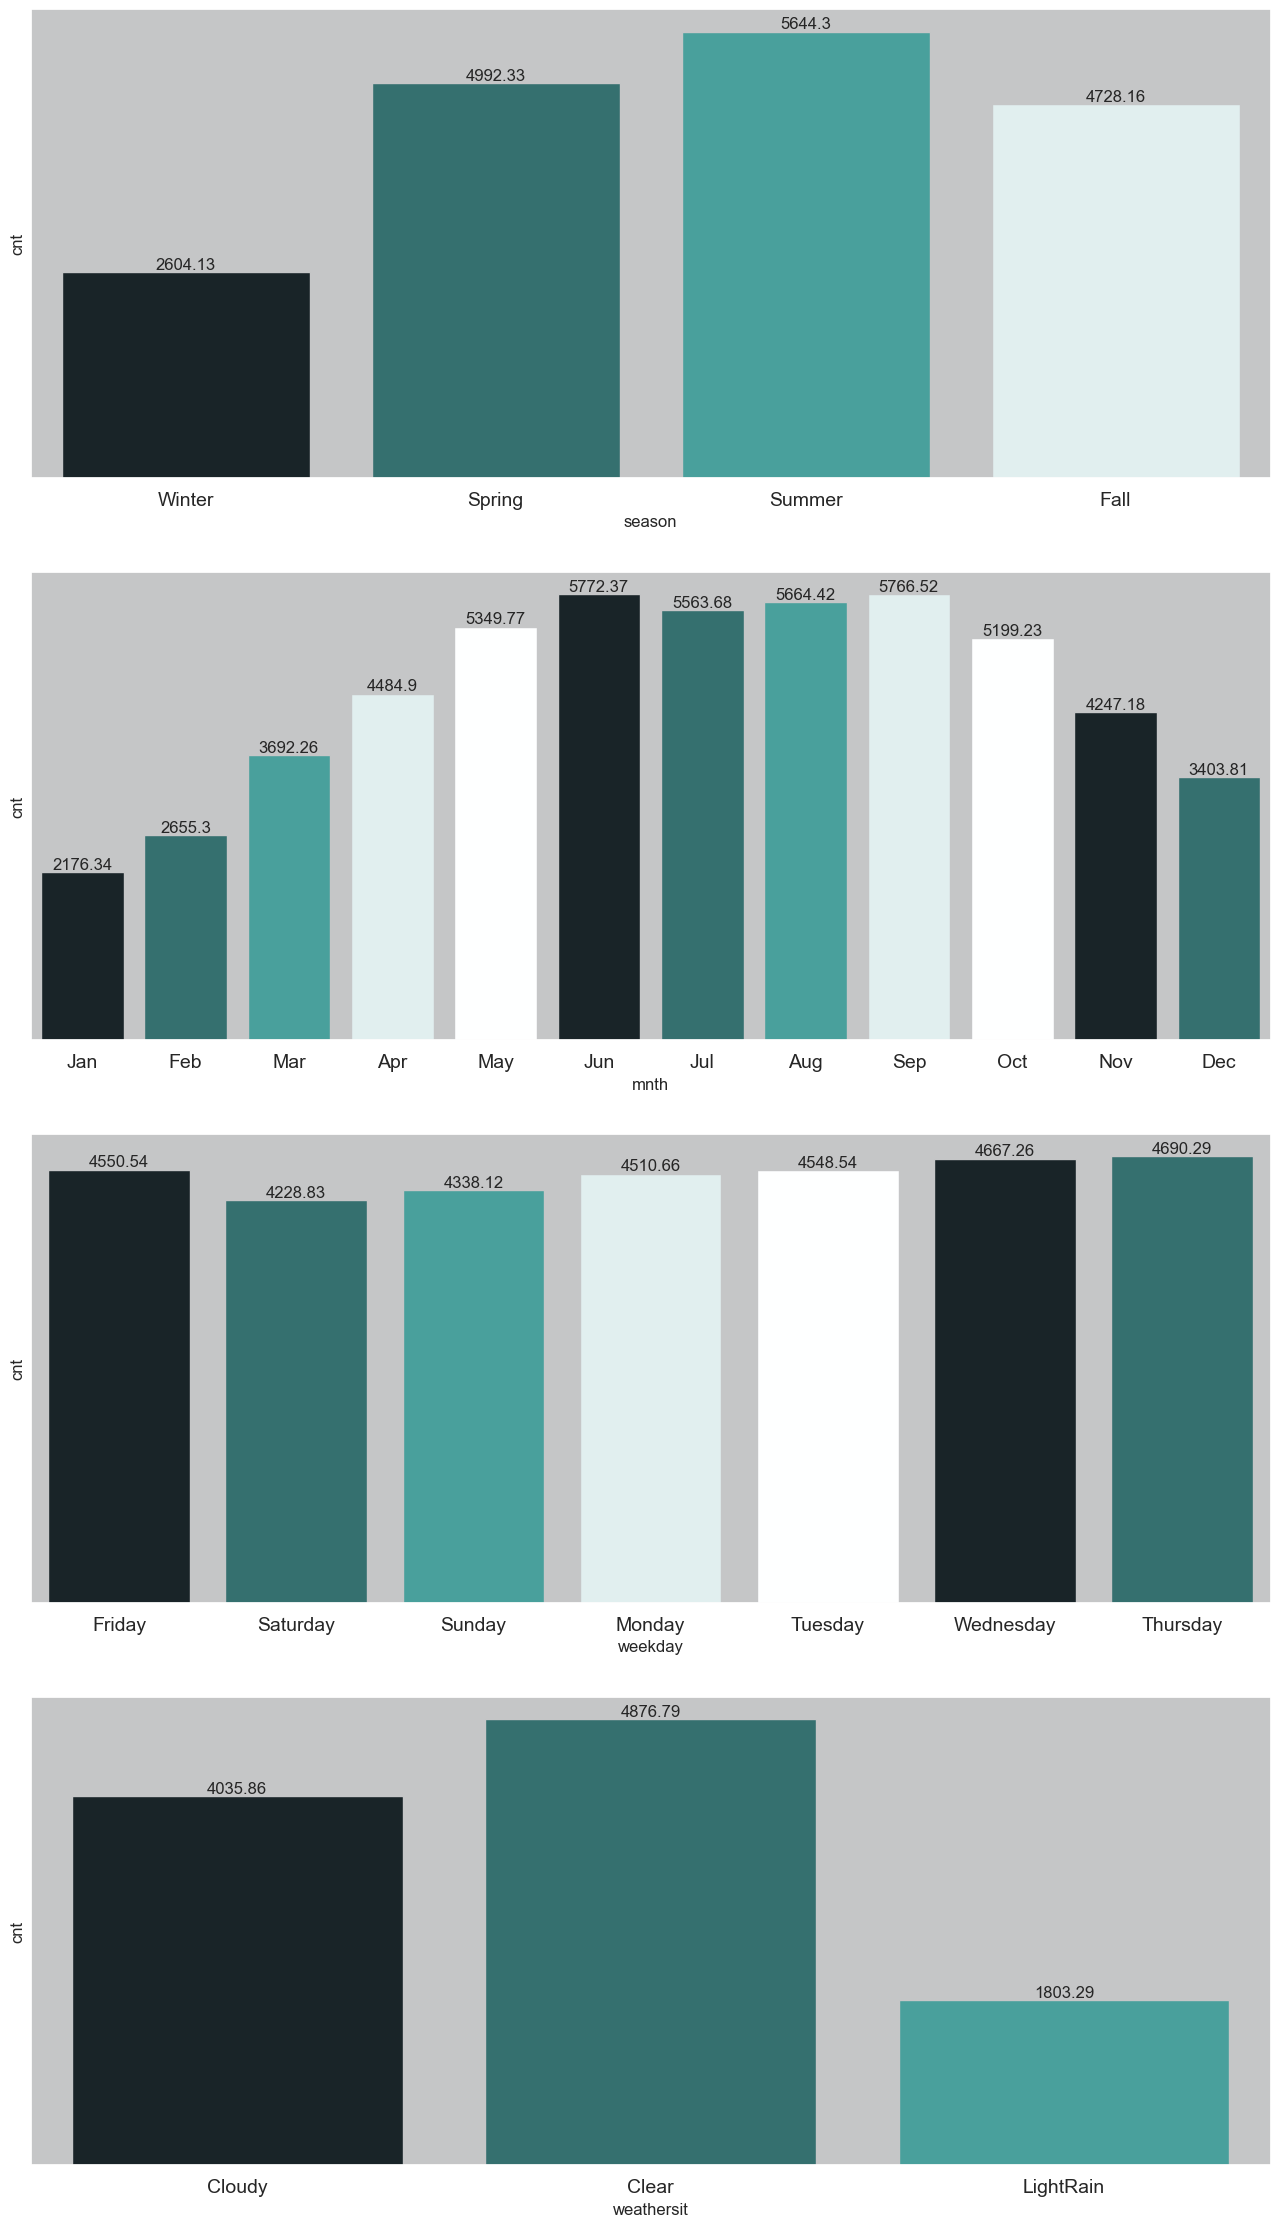

In [6]:
# Performing EDA on the Categorical columns (Hidden Input)
num_cols = list(df.select_dtypes(["int64","float64"]))
cat_cols = list(df.select_dtypes("object"))

# Columns required for Categrical visualizations
cat_col_vis = ['season','mnth','weekday','weathersit']

fig, ax = plt.subplots(ncols=1, nrows=4, figsize=(16, 28))
i = 0 #counter

for cols in cat_col_vis:
    sns.barplot(x=df[cols], y=df['cnt'], fill=True, alpha=1, ci=None, ax=ax[i], palette=('#17252a', '#2b7a78','#3aafa9',
                                                                                                     '#def2f1','#feffff'),
                                                                                            edgecolor="#c5c6c7")
    # ax[i].set_xlabel(' ')
    # ax[i].set_xlabel(' ')
    # ax[i].set_ylabel(' ')
    ax[i].xaxis.set_tick_params(labelsize=14)
    ax[i].tick_params(left=False, labelleft=False)
    # ax[i].set_ylabel(cols, fontsize=16)    
    ax[i].grid(False)
    ax[i].bar_label(ax[i].containers[0], size="12")
    i=i+1
    
plt.show()

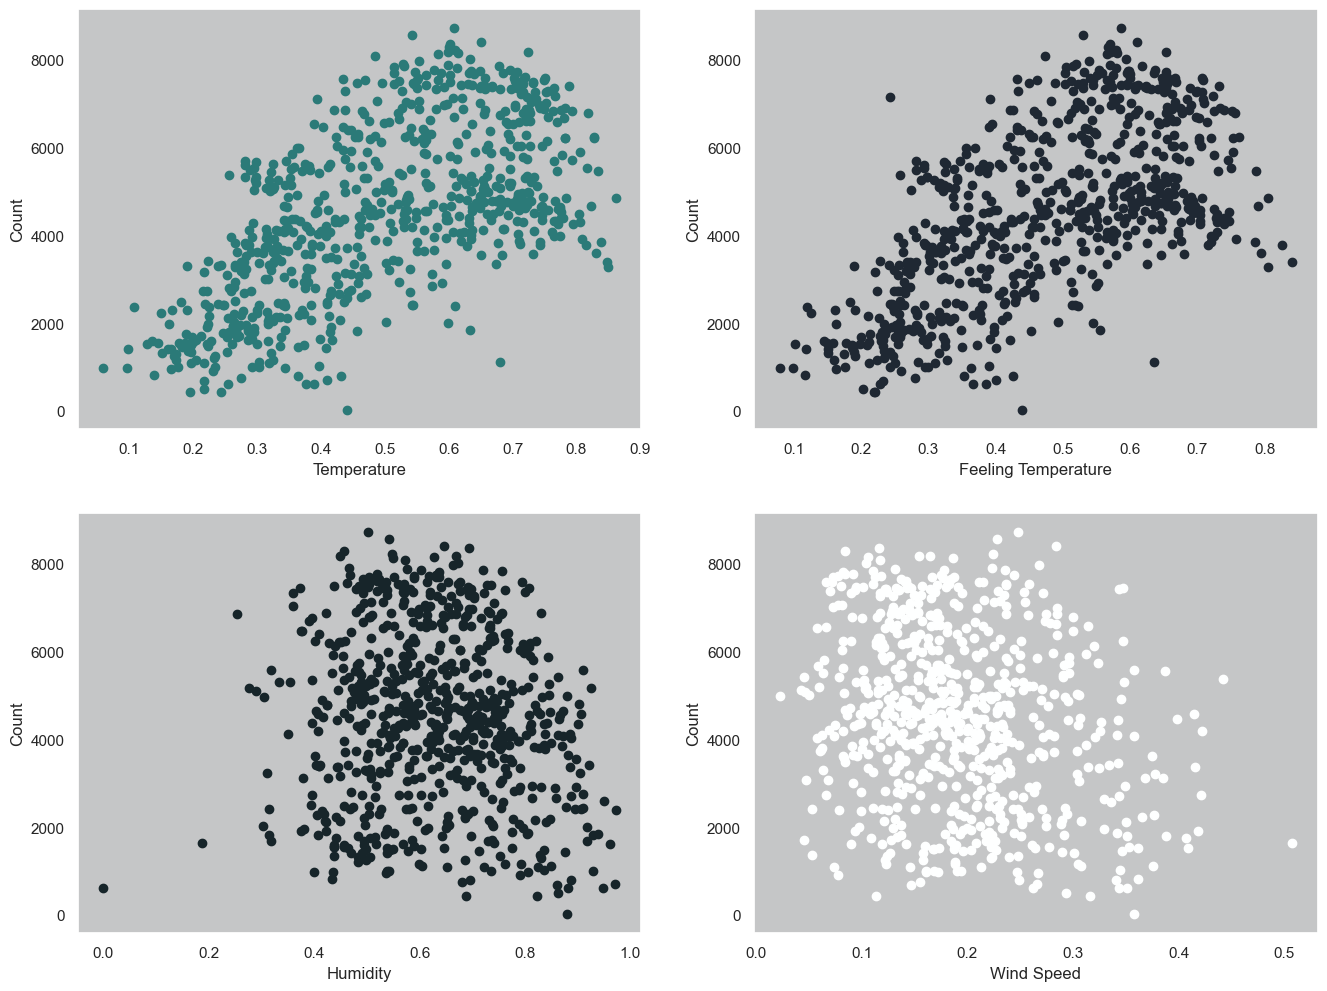

In [7]:
# Visualizing the Numerical Columns (Hidden Input) and treating outliers

plt.figure(figsize=[16,12])
plt.subplot(2,2,1)

plt.scatter( x=df['temp'], y=df['cnt'], c="#2b7a78")
plt.xlabel("Temperature")
plt.ylabel("Count")
plt.grid(False)

plt.subplot(2,2,2)
plt.scatter( x=df['atemp'], y=df['cnt'], c='#1f2833')
plt.xlabel("Feeling Temperature")
plt.ylabel("Count")
plt.grid(False)

plt.subplot(2,2,3)
plt.scatter( x=df['hum'], y=df['cnt'], c='#17252a')
plt.xlabel("Humidity")
plt.ylabel("Count")
plt.grid(False)

plt.subplot(2,2,4)
plt.scatter( x=df['windspeed'], y=df['cnt'], c='#feffff')
plt.xlabel("Wind Speed")
plt.ylabel("Count")
plt.grid(False)

plt.show()

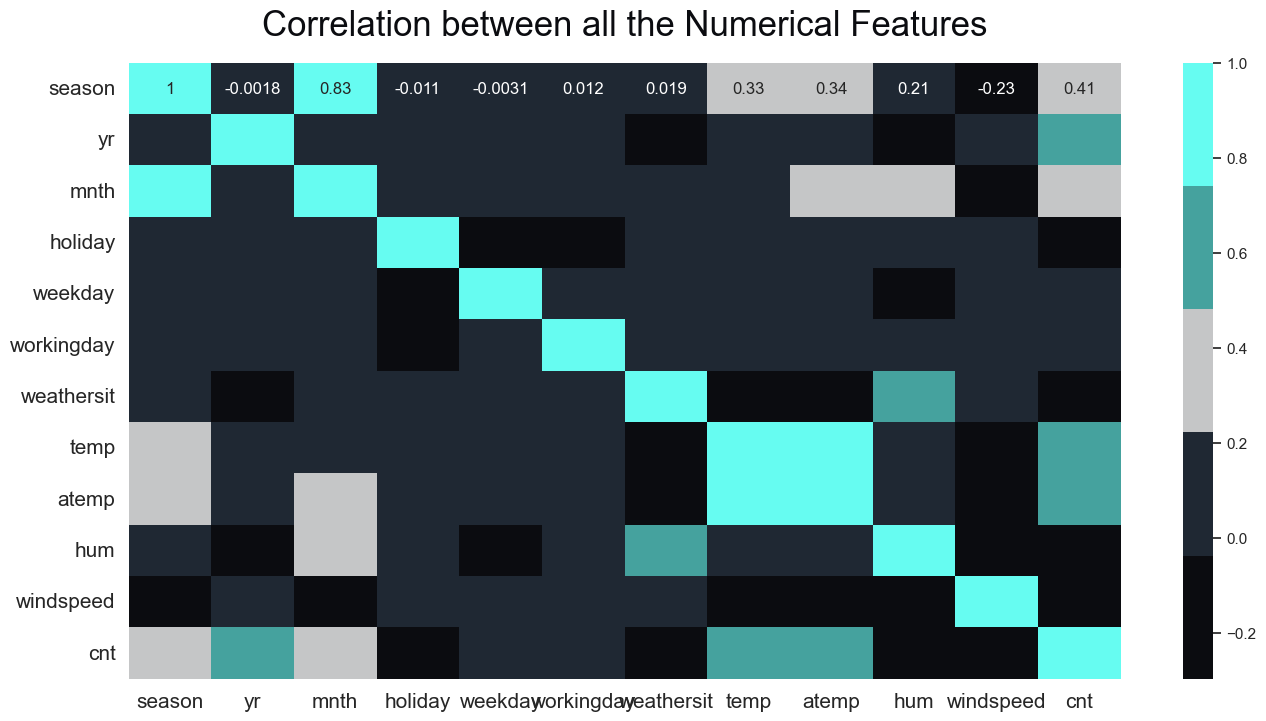

In [8]:
# Creating a heatmap

heat = df_num.corr()
plt.figure(figsize=[16,8])
plt.title("Correlation between all the Numerical Features", size=25, pad=20, color='#0b0c10')
sns.heatmap(heat, cmap=['#0b0c10', '#1f2833','#c5c6c7','#45a29e','#66fcf1'], annot=True)
plt.xticks(size=15)
plt.yticks(size=15, rotation=360)
plt.show()

# Data Preparation

In [9]:
# Splitting the data into X and y
y = df_num.pop('cnt')
X = df_num

# Performing the train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=69)

In [ ]:
# Normalizing our data...
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Dimentionality Reduction using PCA

In [11]:
# Applying PCA on our data
pca = PCA(random_state=69) # Initially not deciding the number of component, we will check that using scree plot
pca.fit(X_train) # Fitting the model

PCA(random_state=69)

**Scree Plot**
- X-axis: Represents the principal components (PC1, PC2, PC3, etc.).
- Y-axis: Represents the eigenvalues or the proportion of variance explained by each principal component.

- Interpretation
- - Variance Explained:
- - Each point on the scree plot represents the variance explained by a principal component.
The first few components usually explain most of the variance.
- - Elbow Point:
- - Look for an "elbow" in the plot, where the explained variance starts to level off.
The components before the elbow point are typically retained, as they explain most of the variance.
- Components after the elbow point contribute less to the total variance and can often be discarded.
- Cumulative Variance:
Sometimes, a cumulative variance plot is used alongside the scree plot to show the total variance explained by the first n components.
A common threshold is to retain enough components to explain 70-90% of the total variance.

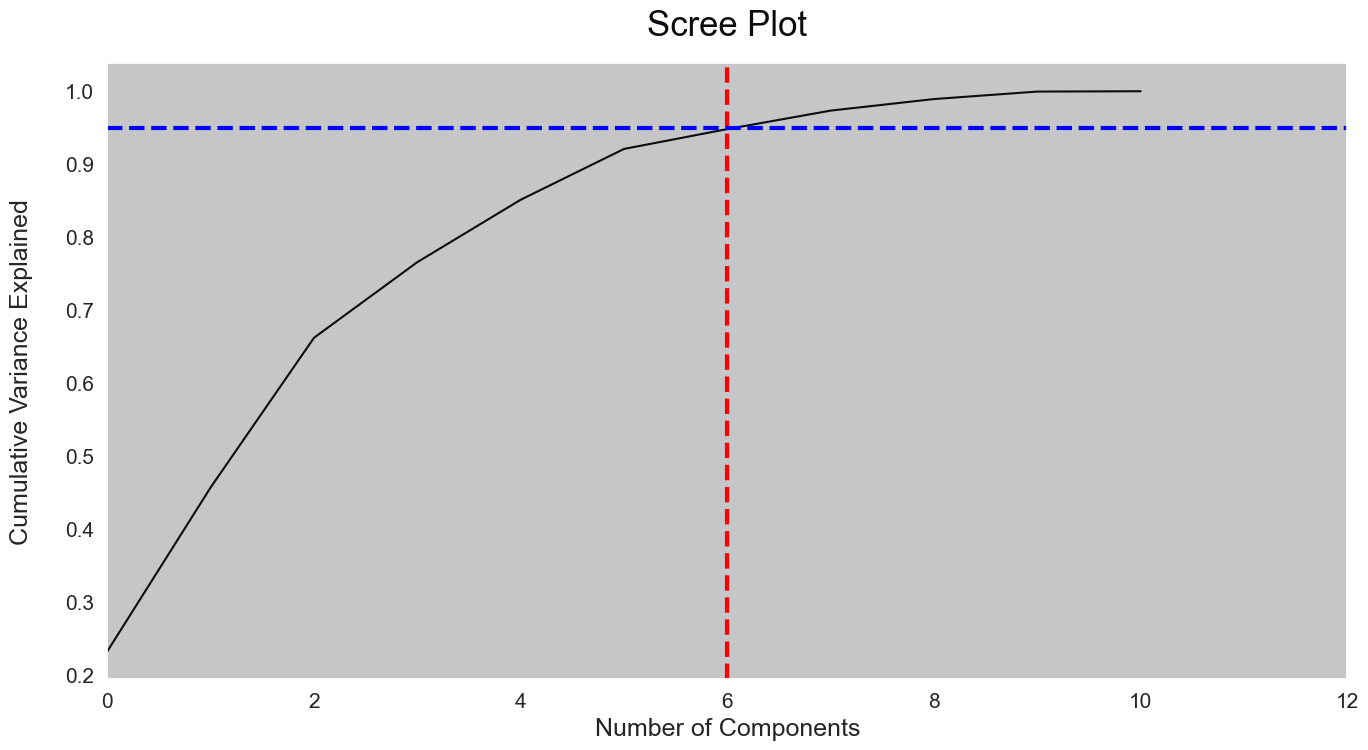

In [46]:
# Visualizing the scree plot
var_cumulative = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=[16,8])
plt.plot(var_cumulative, color="#0b0c10")

plt.axvline(6, color="red", linestyle='--', linewidth='3')
plt.axhline(0.95, color="blue", linestyle='--', linewidth='3')

plt.title("Scree Plot", size=25, pad=20, color="#0b0c10")
plt.xlabel("Number of Components", size=18)
plt.ylabel("Cumulative Variance Explained\n", size=18)

plt.xticks(size=15)
plt.yticks(size=15)

plt.xlim(0,df_num.shape[1]+1)
plt.grid(False)
plt.show()

In [15]:
df.shape

(731, 12)

In [38]:
# Using IncrementalPCA for component selection
pca_final = IncrementalPCA(n_components=6) # Specifying the n_components to 6 as per Scree Plot
df_train_pca = pca_final.fit_transform(X_train) # Always fit_transform() on train data
df_test_pca = pca_final.transform(X_test)# Always transform() on test data

# Model Building

In [19]:
pip install lazyPredict

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 13.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 16.8 MB/s eta 0:00:00 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [ ]:
# Comparing all the model performance at once using Lazy Predict
from lazypredict.Supervised import LazyRegressor
reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(df_train_pca, df_test_pca, y_train, y_test)

 74%|███████▍  | 31/42 [00:02<00:00, 13.96it/s]

QuantileRegressor model failed to execute
Solver interior-point is not anymore available in SciPy >= 1.11.0.


100%|██████████| 42/42 [00:02<00:00, 15.16it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000420 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1026
[LightGBM] [Info] Number of data points in the train set: 511, number of used features: 6
[LightGBM] [Info] Start training from score 4494.843444
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

In [40]:
print(predictions)

                               Adjusted R-Squared  R-Squared    RMSE  \
Model                                                                  
ExtraTreesRegressor                          0.88       0.89  663.40   
RandomForestRegressor                        0.87       0.87  703.09   
GradientBoostingRegressor                    0.87       0.87  710.60   
LGBMRegressor                                0.87       0.87  711.53   
HistGradientBoostingRegressor                0.86       0.87  713.74   
XGBRegressor                                 0.86       0.86  728.86   
BaggingRegressor                             0.86       0.86  736.31   
AdaBoostRegressor                            0.79       0.80  884.31   
KNeighborsRegressor                          0.79       0.79  891.14   
ExtraTreeRegressor                           0.78       0.79  900.34   
SGDRegressor                                 0.77       0.78  922.93   
HuberRegressor                               0.77       0.78  92

In [41]:
# From the above LazyPredict output, it is totally upto us to choose the model for our business decisions
# In this case, I want to experiment with ExtraTreesRegressor, because, why not :)
etr = ExtraTreesRegressor()
etr.fit(df_train_pca, y_train)

ExtraTreesRegressor()

In [57]:
# Checking our Model Performance
y_pred_test = etr.predict(df_test_pca)

print(f"R2 score on test data: {r2_score(y_true=y_test, y_pred=y_pred_test):.3f}") # r2_score on test data

R2 score on test data: 0.882


In [55]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Assuming y_test are the actual values and y_pred_test are the predicted values
mae = mean_absolute_error(y_test, y_pred_test)
mse = mean_squared_error(y_test, y_pred_test)
rmse = mean_squared_error(y_test, y_pred_test, squared=False)  # squared=False returns RMSE

# target variable range
max_y = y.max()
min_y = y.min()
print(f'The range of target variable: {min_y} - {max_y}')

print(f'MAE: {mae:.2f}, {mae / max_y * 100:.2f}%')
print(f'MSE: {mse:.2f}, {mse / max_y * 100:.2f}%')
print(f'RMSE: {rmse:.2f}, {rmse / max_y * 100:.2f}%')

The range of target variable: 22 - 8714
MAE: 461.29, 5.29%
MSE: 456575.26, 5239.56%
RMSE: 675.70, 7.75%
